In [1]:
import numpy as np
import pandas as pd
import artist_info_helper as aih

import glob, os, re, sys
from datetime import datetime
import pickle
import time
import copy
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('mpl_style_Jeffreson.mplstyle')

In [2]:
def log_format(x, pos):
    return f'{int(x)}'

# analysis for 10000 random artists

In [3]:
DEFAULT_RND_DIR = "/n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/artist-database/"
data = pd.read_csv(DEFAULT_RND_DIR + "Spotify_artist_info_Mnth-Lstnrs.csv")

ds = pd.Series(data['monthly_listeners'])
# exclude zero monthly listeners because we don't know whether it's 0 or just not listed
ds = ds[ds>0]
print(len(ds))

23638


391.0


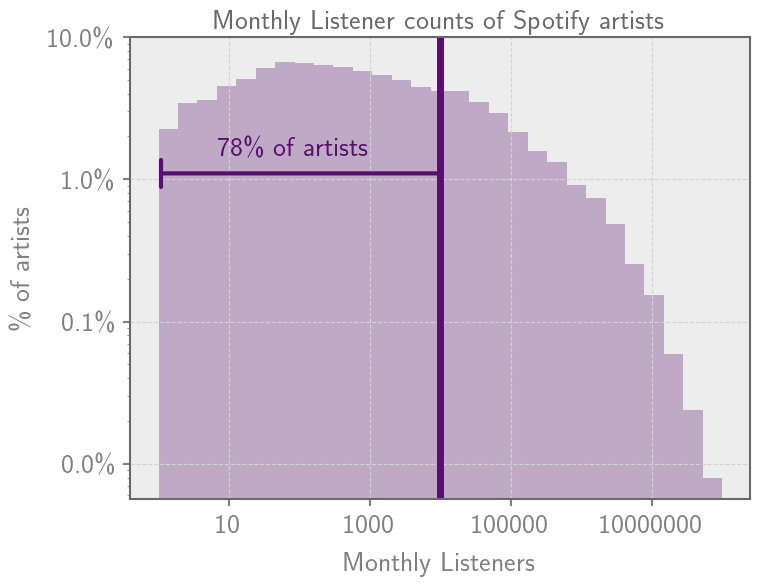

In [4]:
plt.figure(figsize=(8, 6))
def percent_formatter(x, pos):
    return f'{x*100:.1f}\%'

# plot data
weights = np.ones_like(ds) / len(data['monthly_listeners'])
plt.hist(ds, bins=np.logspace(0., 8., 30), weights=weights,
         alpha=0.3, lw=2, log=True, color=plt.cm.inferno(0.25))

# # median
print(ds.median())
# plt.axvline(ds.median(), color=plt.cm.inferno(0.25), lw=2)
# plt.annotate(f'50\% of artists', xy=(ds.median()-80, 0.001), xytext=(ds.median()-80, 0.001),
#              va='top', ha='right', color=plt.cm.inferno(0.25))
# plt.annotate('',
#     xy=(1., 0.00055), xytext=(ds.median(), 0.00055),
#     arrowprops=dict(arrowstyle="|-|,widthA=0.,widthB=0.5", facecolor=plt.cm.inferno(0.25), edgecolor=plt.cm.inferno(0.25), lw=3),
# )

# percentile rank below 10000
plt.axvline(10000., color=plt.cm.inferno(0.25), lw=5)
percentage_below = ((ds < 10000.).mean() * 100).round().astype(int)
plt.annotate(f'{percentage_below}\% of artists', xy=(1000., 0.02), xytext=(1000., 0.02),
             va='top', ha='right', color=plt.cm.inferno(0.25))
plt.annotate('',
    xy=(1., 0.011), xytext=(10000., 0.011),
    arrowprops=dict(arrowstyle="|-|,widthA=0.,widthB=0.5", facecolor=plt.cm.inferno(0.25), edgecolor=plt.cm.inferno(0.25), lw=3),
)

plt.xscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent_formatter))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(log_format))

plt.title(r'Monthly Listener counts of Spotify artists', color='dimgrey')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'\% of artists')
plt.ylim([plt.gca().get_ylim()[0], 0.1])

plt.savefig("/n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/figs/total_dstbn.png",
            format='png', bbox_inches='tight', dpi=200)
plt.show()

# separate out active artists

In [5]:
active_artists = aih.get_active_artists(data)
ds_active = pd.Series(active_artists['monthly_listeners'])
ds_active = ds_active[ds_active>0]
print(len(ds_active))

1209


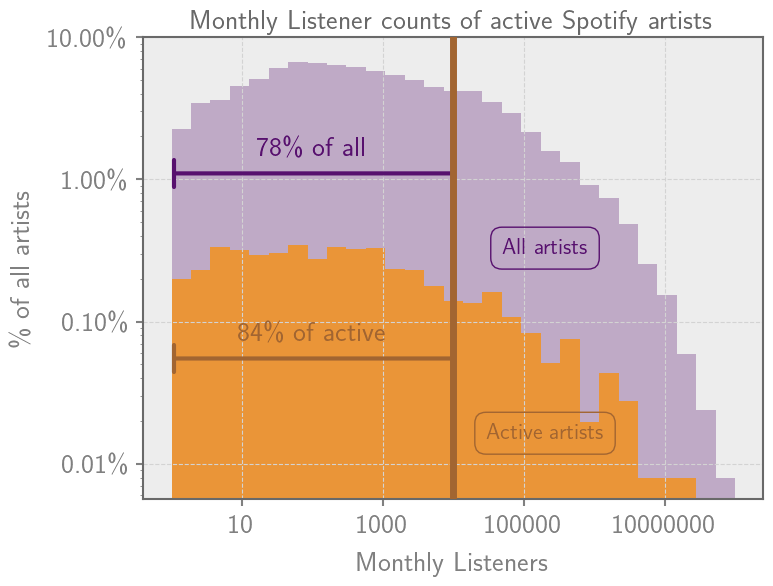

In [6]:
plt.figure(figsize=(8, 6))
def percent_formatter(x, pos):
    return f'{x*100:.2f}\%'

# plot data
weights = np.ones_like(ds) / len(data['monthly_listeners'])
plt.hist(ds, bins=np.logspace(0., 8., 30), weights=weights,
         alpha=0.3, lw=2, log=True, color=plt.cm.inferno(0.25))
weights = np.ones_like(ds_active) / len(data['monthly_listeners'])
plt.hist(ds_active,
         bins=np.logspace(0., 8., 30), weights=weights,
         alpha=0.75, lw=2, log=True, color=plt.cm.inferno(0.75))

# percentile rank below 10000, all
percentage_below = ((ds < 10000.).mean() * 100).round().astype(int)
plt.annotate(f'{percentage_below}\% of all', xy=(100., 0.02), xytext=(100., 0.02),
             va='top', ha='center', color=plt.cm.inferno(0.25))
plt.annotate('',
    xy=(1., 0.011), xytext=(10000., 0.011),
    arrowprops=dict(arrowstyle="|-|,widthA=0.,widthB=0.5", facecolor=plt.cm.inferno(0.25), edgecolor=plt.cm.inferno(0.25), lw=3),
)

# percentile rank below 10000, active
plt.axvline(10000., color="#A26531", lw=5, zorder=5)
percentage_below = ((ds_active < 10000.).mean() * 100).round().astype(int)
plt.annotate(f'{percentage_below}\% of active', xy=(100., 0.001), xytext=(100., 0.001),
             va='top', ha='center', color="#A26531")
plt.annotate('',
    xy=(1., 0.00055), xytext=(10000., 0.00055),
    arrowprops=dict(arrowstyle="|-|,widthA=0.,widthB=0.5", facecolor="#A26531", edgecolor="#A26531", lw=3),
)

# annotation of all vs. active artists
plt.annotate('All artists', xy=(2e5, 0.003), xytext=(2e5, 0.003), color=plt.cm.inferno(0.25), ha='center', fontsize=16,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='None', edgecolor=plt.cm.inferno(0.25)))
plt.annotate('Active artists', xy=(2e5, 0.00015), xytext=(2e5, 0.00015), color="#A26531", ha='center', fontsize=16,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='None', edgecolor="#A26531"))

plt.xscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent_formatter))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(log_format))

plt.title(r'Monthly Listener counts of active Spotify artists', color='dimgrey')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'\% of all artists')
plt.ylim([plt.gca().get_ylim()[0], 0.1])

plt.savefig("/n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/figs/total_active_dstbn.png",
            format='png', bbox_inches='tight', dpi=200)

plt.show()

# separate out new active artists

In [7]:
new_active_artists = aih.get_new_active_artists(data)
ds_new_active = pd.Series(new_active_artists['monthly_listeners'])
ds_new_active = ds_new_active[ds_new_active>0]
print(len(ds_new_active))

1065


# Artist info for artists featured on Spotify's editorial/curated/public playlists

In [8]:
del df_edits
DEFAULT_EDITORIAL_DIR = "/n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/artist-database/Editorial-playlists/"
names = glob.glob(DEFAULT_EDITORIAL_DIR + "artists_last_24hrs_*_info.csv")
for name in names:
    df_edit = pd.read_csv(name)
    if 'df_edits' in locals():
        df_edits = pd.concat([df_edits, df_edit])
    else:
        df_edits = df_edit

In [9]:
df_total_edits = pd.read_csv(DEFAULT_EDITORIAL_DIR + "num_featured_artists.csv")
total_featured_edits = pd.Series(df_total_edits['num_artists']).sum()
print(total_featured_edits)

32488


In [10]:
ds_edits = pd.Series(df_edits['monthly_listeners'])
ds_edits = ds_edits[ds_edits>0]

In [11]:
df_edits_active = aih.get_active_artists(df_edits)
ds_edits_active = pd.Series(df_edits_active['monthly_listeners'])
ds_edits_active = ds_edits_active[ds_edits_active>0]
print(len(ds_edits_active)/len(ds_edits))

0.12073510030751208


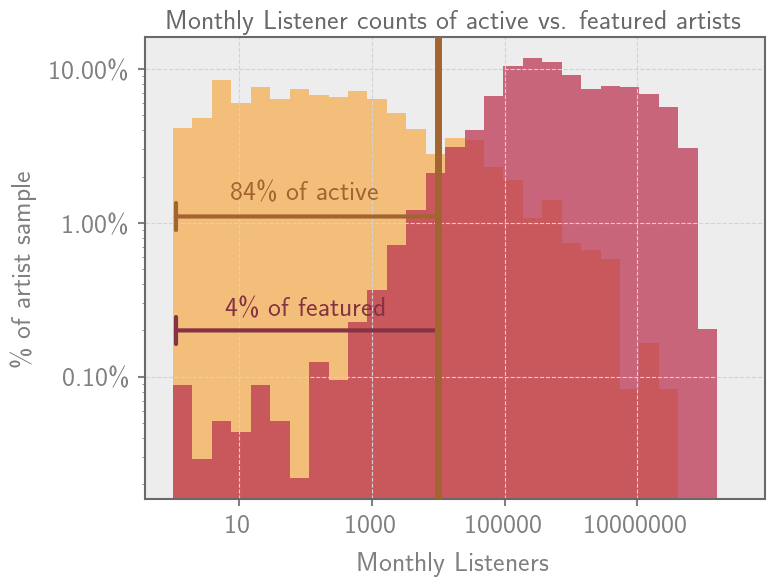

In [17]:
plt.figure(figsize=(8, 6))
def percent_formatter(x, pos):
    return f'{x*100:.2f}\%'

# plot data
weights = np.ones_like(ds_active) / len(ds_active)
plt.hist(ds_active,
         bins=np.logspace(0., 8.5, 30), weights=weights,
         alpha=0.5, lw=2, log=True, color=plt.cm.inferno(0.75))
weights = np.ones_like(ds_edits) / len(ds_edits)
plt.hist(ds_edits,
         bins=np.logspace(0., 8.5, 30), weights=weights,
         alpha=0.75, lw=2, log=True, color=plt.cm.inferno(0.5))

# percentile rank below 1000, editorial
percentage_below = ((ds_edits < 10000.).mean() * 100).round().astype(int)
plt.annotate(f'{percentage_below}\% of featured', xy=(100., 0.0033), xytext=(100., 0.0033),
             va='top', ha='center', color="#853244")
plt.annotate('',
    xy=(1., 0.002), xytext=(10000., 0.002),
    arrowprops=dict(arrowstyle="|-|,widthA=0.,widthB=0.5", facecolor="#853244", edgecolor="#853244", lw=3),
)

# percentile rank below 1000, new active
plt.axvline(10000., color="#A26531", lw=5, zorder=5)
percentage_below = ((ds_active < 10000.).mean() * 100).round().astype(int)
plt.annotate(f'{percentage_below}\% of active', xy=(100., 0.013), xytext=(100., 0.013),
             va='bottom', ha='center', color="#A26531")
plt.annotate('',
    xy=(1., 0.011), xytext=(10000., 0.011),
    arrowprops=dict(arrowstyle="|-|,widthA=0.,widthB=0.5", facecolor="#A26531", edgecolor="#A26531", lw=3),
)

plt.xscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent_formatter))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(log_format))

plt.title(r'Monthly Listener counts of active vs. featured artists', color='dimgrey')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'\% of artist sample')

plt.savefig("/n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/figs/active_vs_editorial_dstbn.png",
            format='png', bbox_inches='tight', dpi=200)

plt.show()

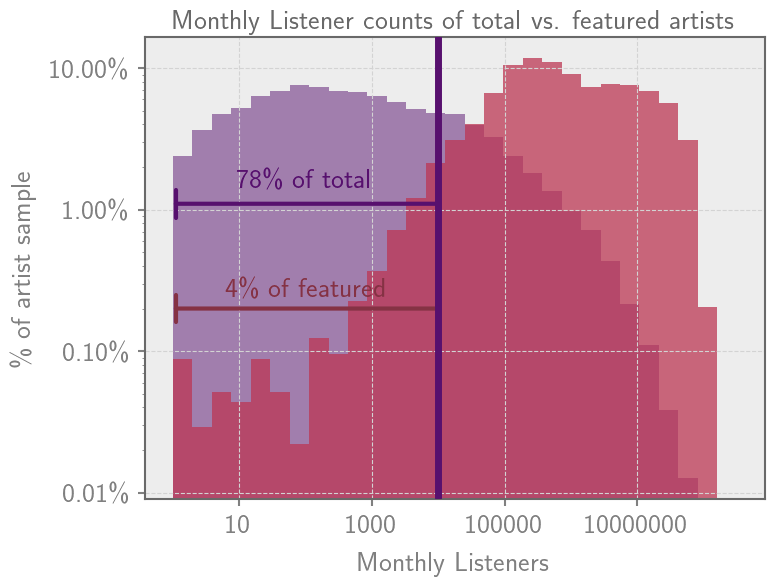

In [19]:
plt.figure(figsize=(8, 6))
def percent_formatter(x, pos):
    return f'{x*100:.2f}\%'

# plot data
weights = np.ones_like(ds) / len(ds)
plt.hist(ds,
         bins=np.logspace(0., 8.5, 30), weights=weights,
         alpha=0.5, lw=2, log=True, color=plt.cm.inferno(0.25))
weights = np.ones_like(ds_edits) / len(ds_edits)
plt.hist(ds_edits,
         bins=np.logspace(0., 8.5, 30), weights=weights,
         alpha=0.75, lw=2, log=True, color=plt.cm.inferno(0.5))

# percentile rank below 1000, editorial
percentage_below = ((ds_edits < 10000.).mean() * 100).round().astype(int)
plt.annotate(f'{percentage_below}\% of featured', xy=(100., 0.0033), xytext=(100., 0.0033),
             va='top', ha='center', color="#853244")
plt.annotate('',
    xy=(1., 0.002), xytext=(10000., 0.002),
    arrowprops=dict(arrowstyle="|-|,widthA=0.,widthB=0.5", facecolor="#853244", edgecolor="#853244", lw=3),
)

# percentile rank below 1000
plt.axvline(10000., color=plt.cm.inferno(0.25), lw=5, zorder=5)
percentage_below = ((ds < 10000.).mean() * 100).round().astype(int)
plt.annotate(f'{percentage_below}\% of total', xy=(100., 0.013), xytext=(100., 0.013),
             va='bottom', ha='center', color=plt.cm.inferno(0.25))
plt.annotate('',
    xy=(1., 0.011), xytext=(10000., 0.011),
    arrowprops=dict(arrowstyle="|-|,widthA=0.,widthB=0.5", facecolor=plt.cm.inferno(0.25), edgecolor=plt.cm.inferno(0.25), lw=3),
)

plt.xscale('log')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(percent_formatter))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(log_format))

plt.title(r'Monthly Listener counts of total vs. featured artists', color='dimgrey')
plt.xlabel(r'Monthly Listeners')
plt.ylabel(r'\% of artist sample')

plt.savefig("/n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/figs/total_vs_editorial_dstbn.png",
            format='png', bbox_inches='tight', dpi=200)

plt.show()

# calculate the chances of being featured with >1 million monthly listeners, assuming 11 million artists on Spotify

In [16]:
percentage_btn_edits = ((ds_edits > 1000000.).mean() * 100)
print(f'{percentage_btn_edits}% of featured + popular')
total_btn_edits = int(percentage_btn_edits/100. * total_featured_edits)
print(f'{total_btn_edits} featured + popular')
percentage_btn = ((ds > 1000000.).mean() * 100)
print(f'{percentage_btn}% of popular')
total_btn = int(percentage_btn/100. * 1.1e7)
print(f'{total_btn} popular')

41.367310282891786% of featured + popular
8202 featured + popular
2.063353676256902% of popular
226968 popular


# what about with <10,000 monthly listeners, and active?

In [17]:
percentage_btn_edits = ((ds_edits_active < 10000.).mean() * 100)
print(f'{percentage_btn_edits}% of featured <10,000')
total_btn_edits = int(percentage_btn_edits/100. * total_featured_edits * len(ds_edits_active)/len(ds_edits))
print(f'{total_btn_edits} featured <10,000')
percentage_btn = ((ds_active < 10000.).mean() * 100)
print(f'{percentage_btn}% of <10,000')
total_btn = int(percentage_btn/100. * 1.1e7 * len(ds_active)/len(ds))
print(f'{total_btn} active <10,000')

9.515260323159785% of featured <10,000
235 featured <10,000
83.62168396770473% of <10,000
463528 active <10,000
